## Variable: &thinsp; Cloud fraction - cl

In [89]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import seaborn as sns

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

import os
import sys
home = os.path.expanduser("~") + '/Documents'
sys.path.insert(0, '{}/code/phd/functions'.format(home))
from myFuncs import *

In [90]:
variable = 'clouds'

data_options = [
    # 'cl_low',
    'cl_high'
    ]

models_cmip5 = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3  no wap data
    # 'bcc-csm1-1',   # 4  only monthly wap (for rcp)
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6  only monthly wap
    # 'HadGEM2-AO',   # 7  only monthly wap
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9  no wap data
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13 only monthly wap
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 only monthly wap
    ]

models_cmip6 = [     
    'TaiESM1',        # 1
    'BCC-CSM2-MR',    # 2
    'FGOALS-g3',      # 3
    'CNRM-CM6-1',     # 4
    'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    'NorESM2-MM',     # 7
    'GFDL-CM4',       # 8
    'CanESM5',        # 9
    'CMCC-ESM2',      # 10
    # 'UKESM1-0-LL',    # 11
    'MRI-ESM2-0',     # 12
    # 'CESM2',          # 13
    'NESM3'           # 14
    ]

datasets = models_cmip5 + models_cmip6

timescales = [
    # 'daily',
    'monthly'
    ]

experiments =[
    'historical',
    # 'rcp85',
    # 'ssp585'
    ]

resolutions = [
    # 'orig',
    'regridded'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])
ds

variable:clouds, dataset:TaiESM1, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (time: 360, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    cl_low   (time, lat, lon) float64 ...
    cl_high  (time, lat, lon) float64 ...

In [91]:
data = ds[data_options[0]]
data

<xarray.DataArray 'cl_high' (time: 360, lat: 22, lon: 128)>
[1013760 values with dtype=float64]
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

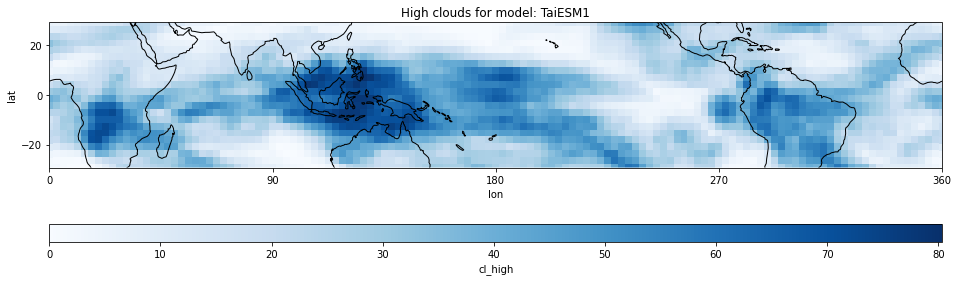

In [102]:
regions = [
    'total',
    # 'descent',
    # 'ascent'
    ]

data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0], timescales[0])[data_options[0]]
scene = pick_region(data, datasets[0], experiments[0], regions[0]).isel(time=0)
title = 'High {} for model: {}'.format(variable, datasets[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title=title)

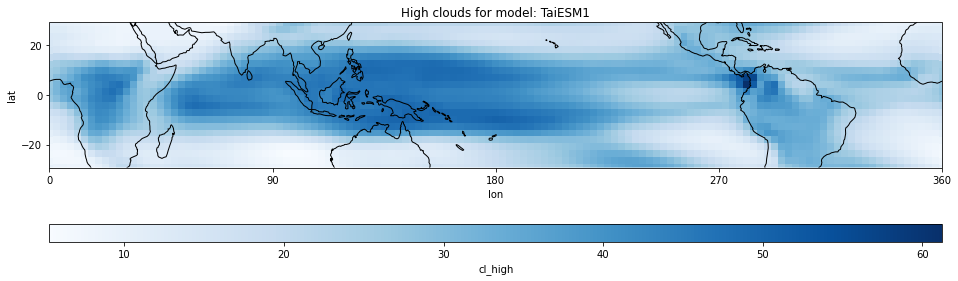

In [93]:
scene = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0], timescales[0])[data_options[0]].mean(dim='time')
title = 'High {} for model: {}'.format(variable, datasets[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title=title)

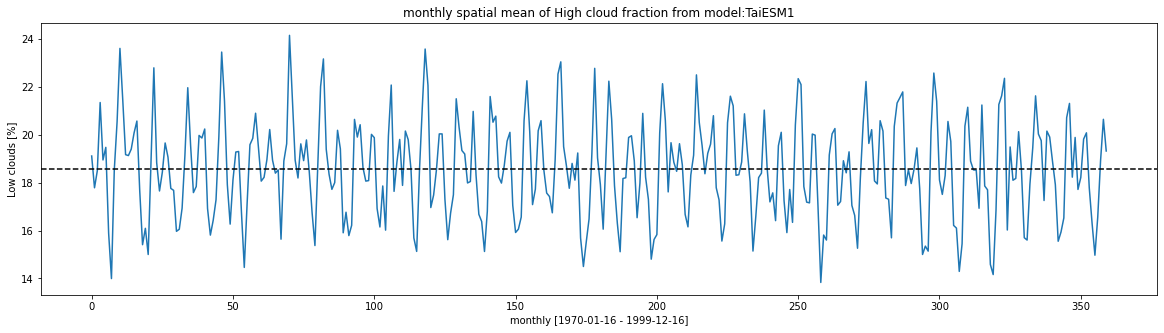

In [94]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly'
    ]

data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0], timescales[0])[data_options[0]]
data = pick_region(data, datasets[0], experiments[0], regions[0])
aWeights = np.cos(np.deg2rad(data.lat))
y= data.weighted(aWeights).mean(dim=('lat','lon')) 
title = '{} spatial mean of {} from model:{}'.format(timeMean_options[0], 'High cloud fraction', datasets[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Low clouds', '%')


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

### comparing datasets

In [104]:
regions = [
    # 'total',
    'descent',
    # 'ascent'
    ]

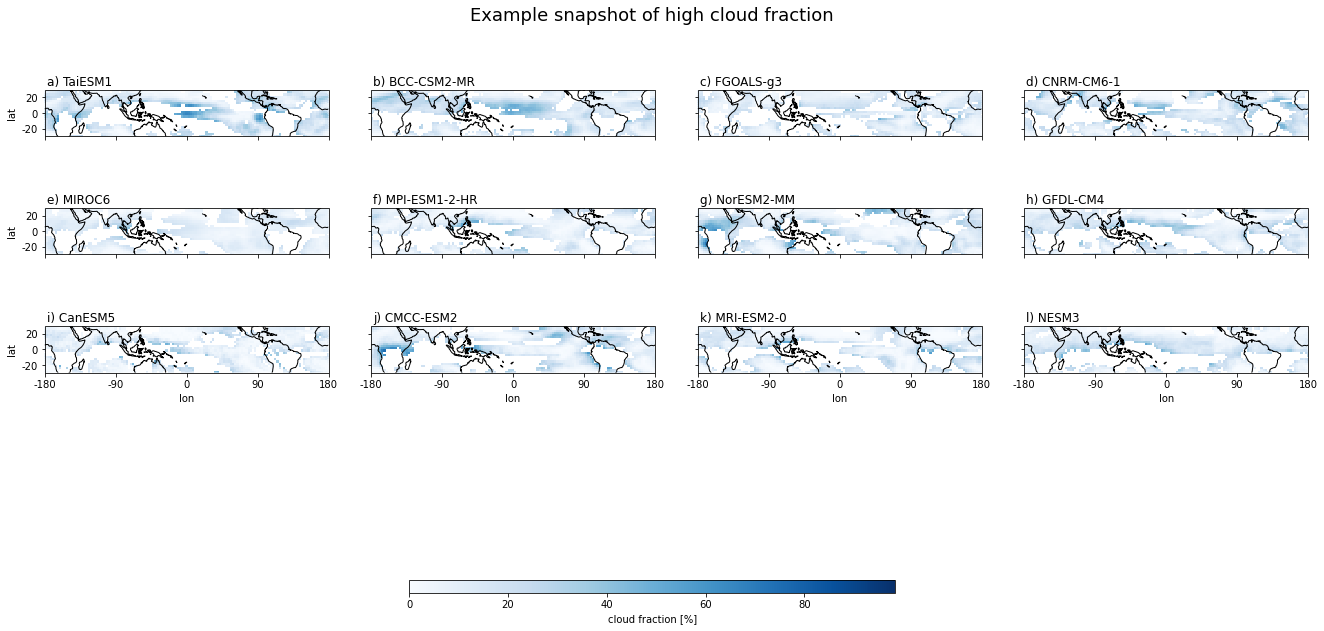

In [105]:
absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0], timescales[0])[data_options[0]]
        y= data

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Example snapshot of {}'.format('high cloud fraction')

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)
for i, dataset in enumerate(datasets):
    data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])[data_options[0]]
    scene = pick_region(data, dataset, experiments[0], regions[0]).isel(time=0)

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax= fig.add_subplot(4,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues', vmin=vmin, vmax=vmax)

    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('cloud fraction', '%'))

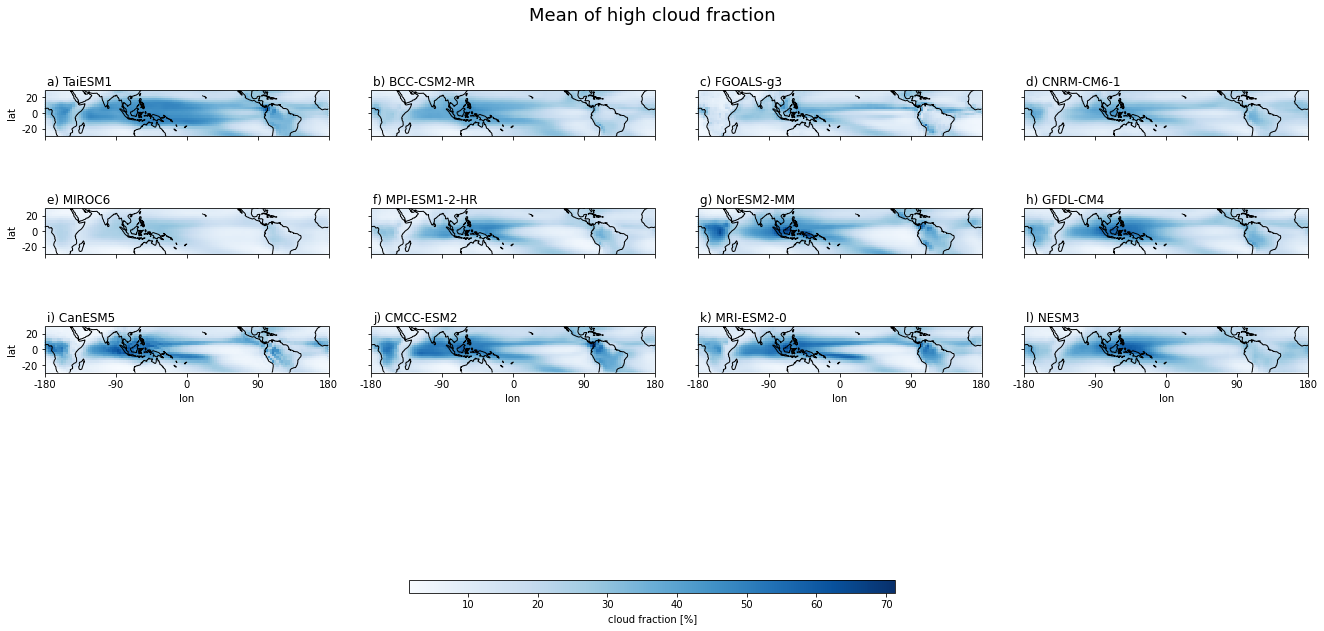

In [106]:
absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0], timescales[0])[data_options[0]].mean(dim='time')
        y= data

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Mean of {}'.format('high cloud fraction')

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)
for i, dataset in enumerate(datasets):
    scene = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])[data_options[0]].mean(dim='time')

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax= fig.add_subplot(4,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues', vmin=vmin, vmax=vmax)

    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('cloud fraction', '%'))

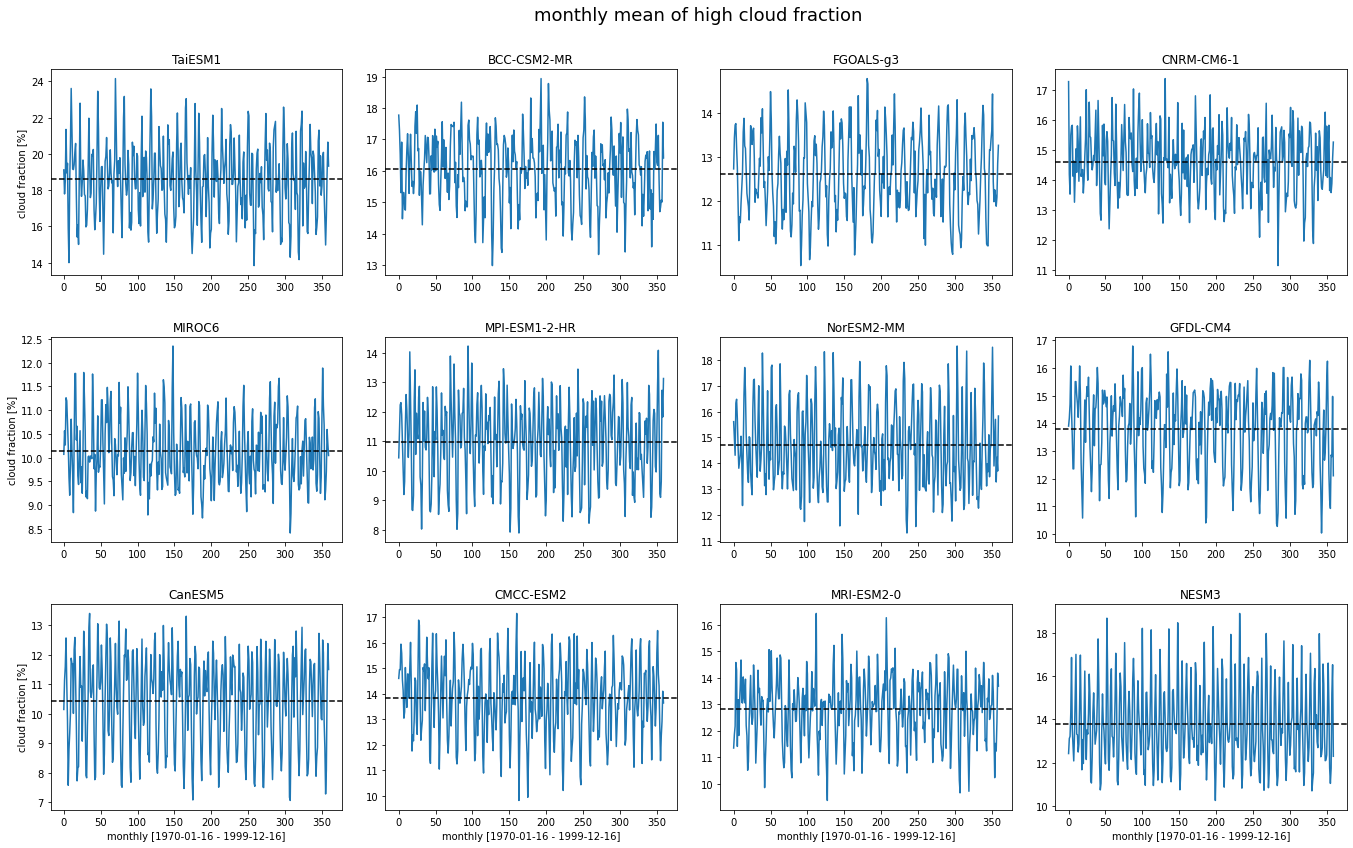

In [107]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    ]

absolute_limits = False
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])[data_options[0]]
        aWeights = np.cos(np.deg2rad(data.lat))
        data = data.weighted(aWeights).mean(dim=('lat','lon'))
        y = resample_timeMean(data, timeMean_options[0])

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} mean of {}'.format(timeMean_options[0], 'high cloud fraction')

fig.suptitle(title, fontsize=18, y=0.95)
for i, dataset in enumerate(datasets):
    
    data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])[data_options[0]]
    data = pick_region(data, dataset, experiments[0], regions[0])
    
    aWeights = np.cos(np.deg2rad(data.lat))
    data = data.weighted(aWeights).mean(dim=('lat','lon'))
    y = resample_timeMean(data, timeMean_options[0])

    title = dataset
    ax= fig.add_subplot(4,4,i+1)
    plot_timeseries(y, title=title, timeMean_option=timeMean_options, ax=ax, ymin=vmin, ymax=vmax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
        plt.xlabel(xlabel)

        if timeMean_options[0]=='seasonal':
            plt.legend()

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel('{} [{}]'.format('cloud fraction', '%'))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

Text(0, 0.5, 'cloud fraction [%]')

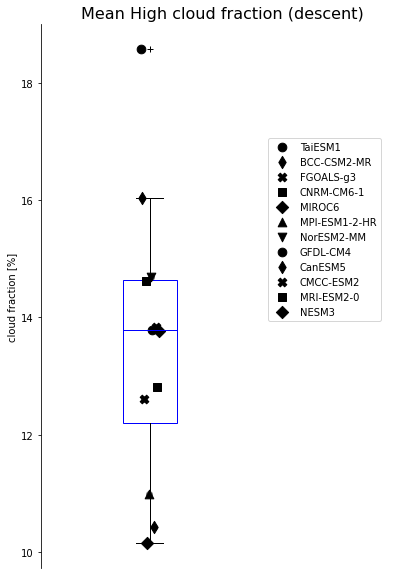

In [108]:
absolute_limits = False
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])[data_options[0]]

        aWeights = np.cos(np.deg2rad(data.lat))
        data = data.weighted(aWeights).mean(dim=('lat','lon')).mean(dim='time')
        y = data

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


order, colors = orderByTas(False, datasets, experiments[0], resolutions[0])

plt.figure(figsize=(6.5,10))
title = 'Mean {} ({})'.format('High cloud fraction', regions[0])
plt.xlim(0,1)
# plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:
    data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])[data_options[0]]
    data = pick_region(data, dataset, experiments[0], regions[0])
    aWeights = np.cos(np.deg2rad(data.lat))
    data = data.weighted(aWeights).mean(dim=('lat','lon')).mean(dim ='time')
    y_data = data
    y = np.append(y, y_data)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

labels = datasets
if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()

    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
                
    plt.legend(bbox_to_anchor=(0.95,0.8))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('cloud fraction [{}]'.format('%'))

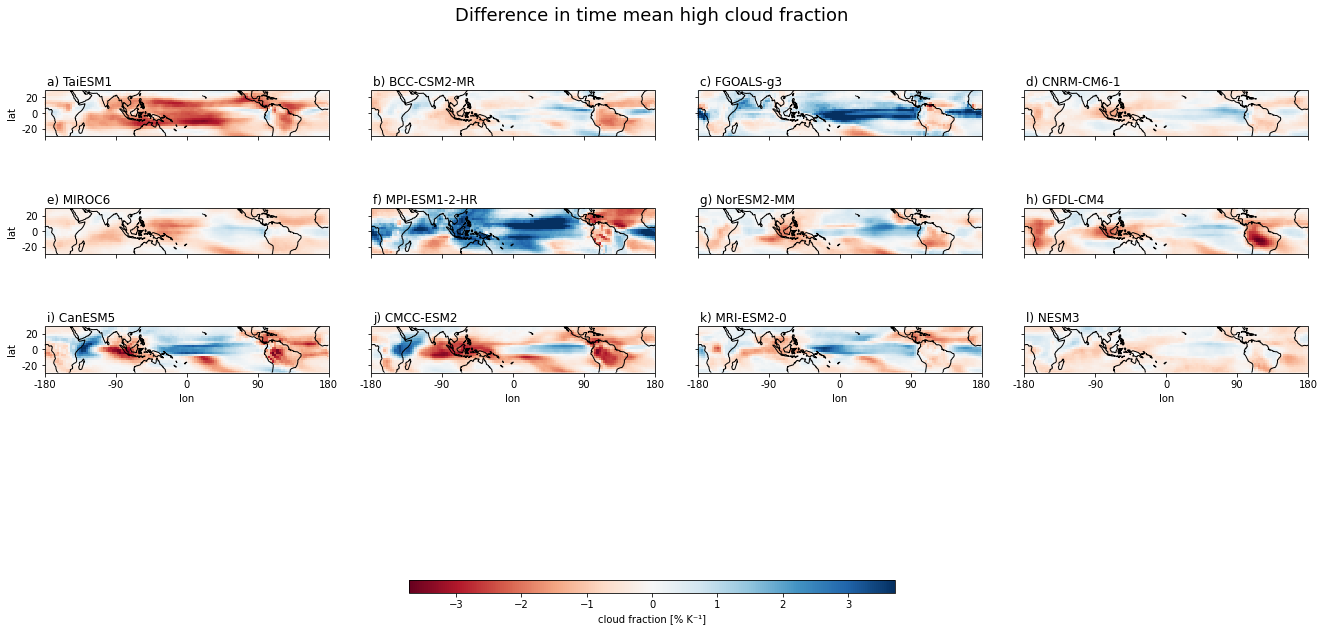

In [109]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.95
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        data_historical = get_dsvariable(variable, dataset, experiment='historical')[data_options[0]].mean(dim='time')
        data_rcp = get_dsvariable(variable, dataset, experiment='ssp585')[data_options[0]].mean(dim='time')
        datadiff = data_rcp - data_historical

        fractional_change = False
        if fractional_change:
            datadiff = (datadiff/data_historical)*100

        divide_by_tasdiff = True
        if divide_by_tasdiff:
            tas_historical = get_metric('tas_sMean', dataset, experiment='historical', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
            tas_rcp = get_metric('tas_sMean', dataset, experiment='ssp585', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
            tasdiff = tas_rcp - tas_historical
            datadiff = datadiff/tasdiff

        vmin = np.append(vmin, np.quantile(datadiff, quantile_low))
        vmax = np.append(vmax, np.quantile(datadiff, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Difference in time mean {}'.format('high cloud fraction')

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)
for i, dataset in enumerate(datasets):
            
    ax= fig.add_subplot(4,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    data_historical = get_dsvariable(variable, dataset, experiment='historical')[data_options[0]].mean(dim='time')
    data_rcp = get_dsvariable(variable, dataset, experiment='ssp585')[data_options[0]].mean(dim='time')
    datadiff = data_rcp - data_historical
    
    fractional_change = False
    if fractional_change:
        datadiff = (datadiff/data_historical)*100

    divide_by_tasdiff = True
    if divide_by_tasdiff:
        tas_historical = get_metric('tas_sMean', dataset, experiment='historical', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tas_rcp = get_metric('tas_sMean', dataset, experiment='ssp585', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tasdiff = tas_rcp - tas_historical
        datadiff = datadiff/tasdiff

    y= datadiff
    cmap = 'RdBu'
    pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=-vmax, vmax=vmax)

    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])


plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('cloud fraction', '% K' + chr(0x207B) + chr(0x00B9)))

Text(0, 0.5, 'cloud fraction [% K⁻¹]')

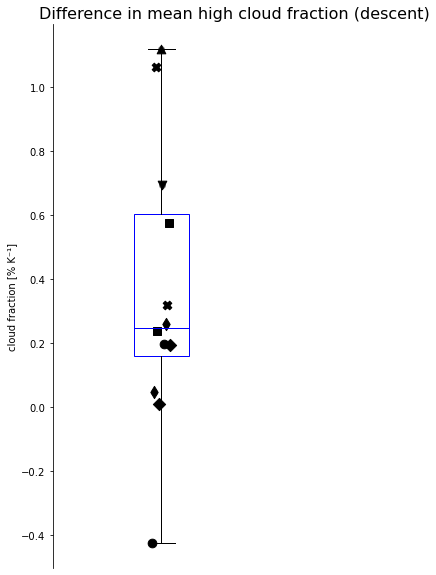

In [110]:
absolute_limits = False
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:        
        data_historical = get_dsvariable(variable +'_vMean', dataset, experiment='historical')[data_options[0]]
        aWeights = np.cos(np.deg2rad(data_historical.lat))
        data_historical = data_historical.weighted(aWeights).mean(dim=('time','lat','lon'))

        data_rcp = get_dsvariable(variable +'_vMean', dataset, experiment='ssp585')[data_options[0]]
        aWeights = np.cos(np.deg2rad(data_rcp.lat))
        data_rcp = data_rcp.weighted(aWeights).mean(dim=('time','lat','lon'))

        datadiff = data_rcp - data_historical

        fractional_change = False
        if fractional_change:
            datadiff = (datadiff/data_historical)*100

        divide_by_tasdiff = True
        if divide_by_tasdiff:
            tas_historical = get_metric('tas_sMean', dataset, experiment='historical', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
            tas_rcp = get_metric('tas_sMean', dataset, experiment='ssp585', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
            tasdiff = tas_rcp - tas_historical
            datadiff = datadiff/tasdiff

        vmin = np.append(vmin, np.quantile(datadiff, quantile_low))
        vmax = np.append(vmax, np.quantile(datadiff, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


order, colors = orderByTasdiff(False, datasets, models_cmip5, resolutions[0])


plt.figure(figsize=(6.5,10))
title = 'Difference in mean {} ({})'.format('high cloud fraction', regions[0])
plt.xlim(0,1)
# plt.ylim(vmin, vmax)

y= []
for dataset in datasets:
    data = get_dsvariable(variable, dataset, experiment='historical')[data_options[0]]
    data_historical = pick_region(data, dataset, experiments[0], regions[0])
    aWeights = np.cos(np.deg2rad(data_historical.lat))
    data_historical = data_historical.weighted(aWeights).mean(dim=('lat','lon')).mean(dim='time')

    data = get_dsvariable(variable, dataset, experiment='ssp585')[data_options[0]]
    data_rcp= pick_region(data, dataset, experiments[0], regions[0])
    aWeights = np.cos(np.deg2rad(data_rcp.lat))
    data_rcp = data_rcp.weighted(aWeights).mean(dim=('lat','lon')).mean(dim='time')

    datadiff = data_rcp - data_historical

    fractional_change = False
    if fractional_change:
        datadiff = (datadiff/data_historical)*100

    divide_by_tasdiff = True
    if divide_by_tasdiff:
        tas_historical = get_metric('tas_sMean', dataset, experiment='historical', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tas_rcp = get_metric('tas_sMean', dataset, experiment='ssp585', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tasdiff = tas_rcp - tas_historical
        datadiff = datadiff/tasdiff

    y = np.append(y, datadiff)
    
plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()

    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    
    # plt.legend(bbox_to_anchor=(0.95,0.8))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('cloud fraction [{}]'.format('% K' + chr(0x207B) + chr(0x00B9)))